In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt

### Checking the Results

In [2]:
folder = 'C:/Users/oryan/Documents/Session_Results/'

In [3]:
samples = np.load(folder+'2022-06-09-20k-run/Results/Run_Samples_Arp148.npy')

In [4]:
samples_SI = samples.copy()
samples_SI[:,0] *= 15
samples_SI[:,1:4] *= 169.34
samples_SI[:,4:6] = np.log10(1e11*samples_SI[:,6:8])
samples_SI[:,6:8] *= 15
for i in range(4):
    for j in range(samples_SI.shape[0]):
        if samples[j,8+i] > 180:
            samples[j,8+i] -= 180

In [5]:
samples.shape

(7520, 14)

In [6]:
np.max(samples[:,13])

-3.840568522622325

In [7]:
Labels = ['z(kpc)','v$_{x}$(km/s)','v$_{y}(km/s)$','v$_{z}$(km/s)','log$_{10}$(M$_1$(M$_{\odot}$))','log$_{10}$(M$_2$(M$_{\odot}$))','R$_{1}$(kpc)','R$_{2}$(kpc)','$\phi_1$','$\phi_2$','$\Theta_1$','$\Theta_2$','t(Myrs)']

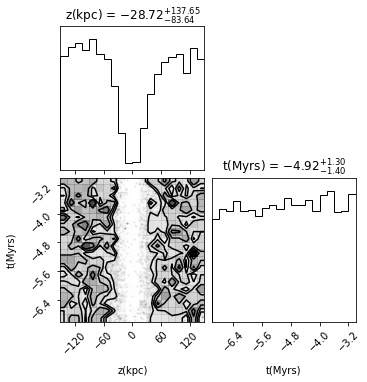

In [17]:
z_t = np.zeros([samples_SI.shape[0],2])
z_t[:,0] = samples_SI[:,0].copy()
z_t[:,1] = samples_SI[:,12].copy()
fig_pos = corner.corner(z_t,labels=[Labels[0],Labels[12]],show_titles=True)
plt.gcf()
plt.savefig('C:/Users/oryan/Documents/esac-project/short-presentations/phd_demo_figures/z_t.jpeg', dpi=100, bbox_inches='tight')

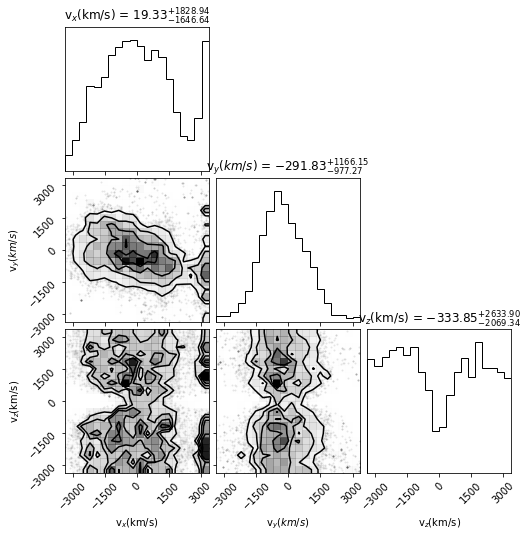

In [18]:
fig_vel = corner.corner(samples_SI[:,1:4],labels=Labels[1:4],show_titles=True)
plt.gcf()
plt.savefig('C:/Users/oryan/Documents/esac-project/short-presentations/phd_demo_figures/v.jpeg', dpi=100, bbox_inches='tight')

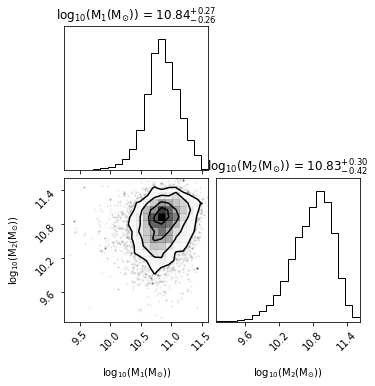

In [19]:
fig_mass = corner.corner(samples_SI[:,4:6],labels=Labels[4:6],show_titles=True)
plt.gcf()
plt.savefig('C:/Users/oryan/Documents/esac-project/short-presentations/phd_demo_figures/M.jpeg', dpi=100, bbox_inches='tight')

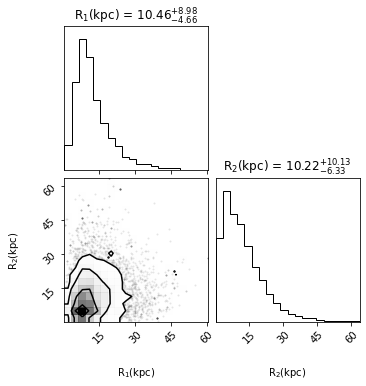

In [20]:
fig_rad = corner.corner(samples_SI[:,6:8],labels=Labels[6:8],show_titles=True)
plt.gcf()
plt.savefig('C:/Users/oryan/Documents/esac-project/short-presentations/phd_demo_figures/R.jpeg', dpi=100, bbox_inches='tight')

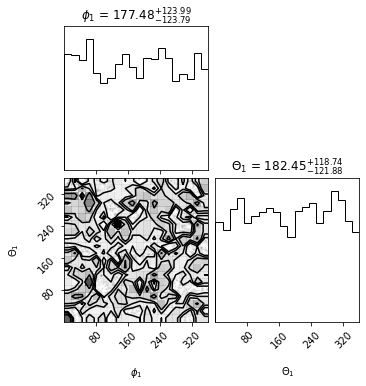

In [21]:
samples_prim = np.zeros([samples_SI.shape[0],2])
samples_prim[:,0] = samples_SI[:,8].copy()
samples_prim[:,1] = samples_SI[:,10].copy()
fig_prim = corner.corner(samples_prim,labels=[Labels[8], Labels[10]],show_titles=True)
plt.gcf()
plt.savefig('C:/Users/oryan/Documents/esac-project/short-presentations/phd_demo_figures/o_1.jpeg', dpi=100, bbox_inches='tight')

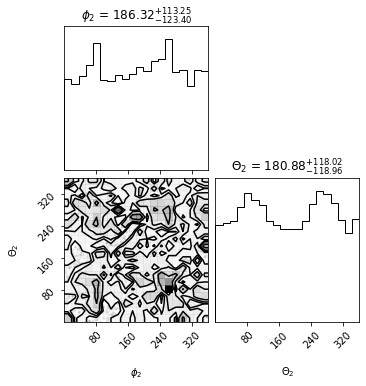

In [22]:
samples_sec = np.zeros([samples_SI.shape[0],2])
samples_sec[:,0] = samples_SI[:,9].copy()
samples_sec[:,1] = samples_SI[:,11].copy()
fig_sec = corner.corner(samples_sec,labels=[Labels[9], Labels[11]],show_titles=True)
plt.gcf()
plt.savefig('C:/Users/oryan/Documents/esac-project/short-presentations/phd_demo_figures/o_2.jpeg', dpi=100, bbox_inches='tight')

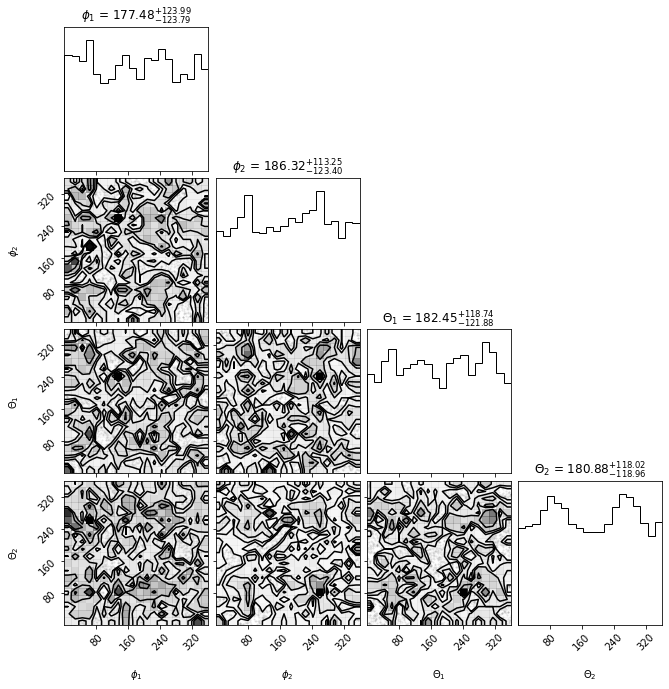

In [14]:
fig_all_ang = corner.corner(samples_SI[:,8:12],labels=Labels[8:12],show_titles=True)

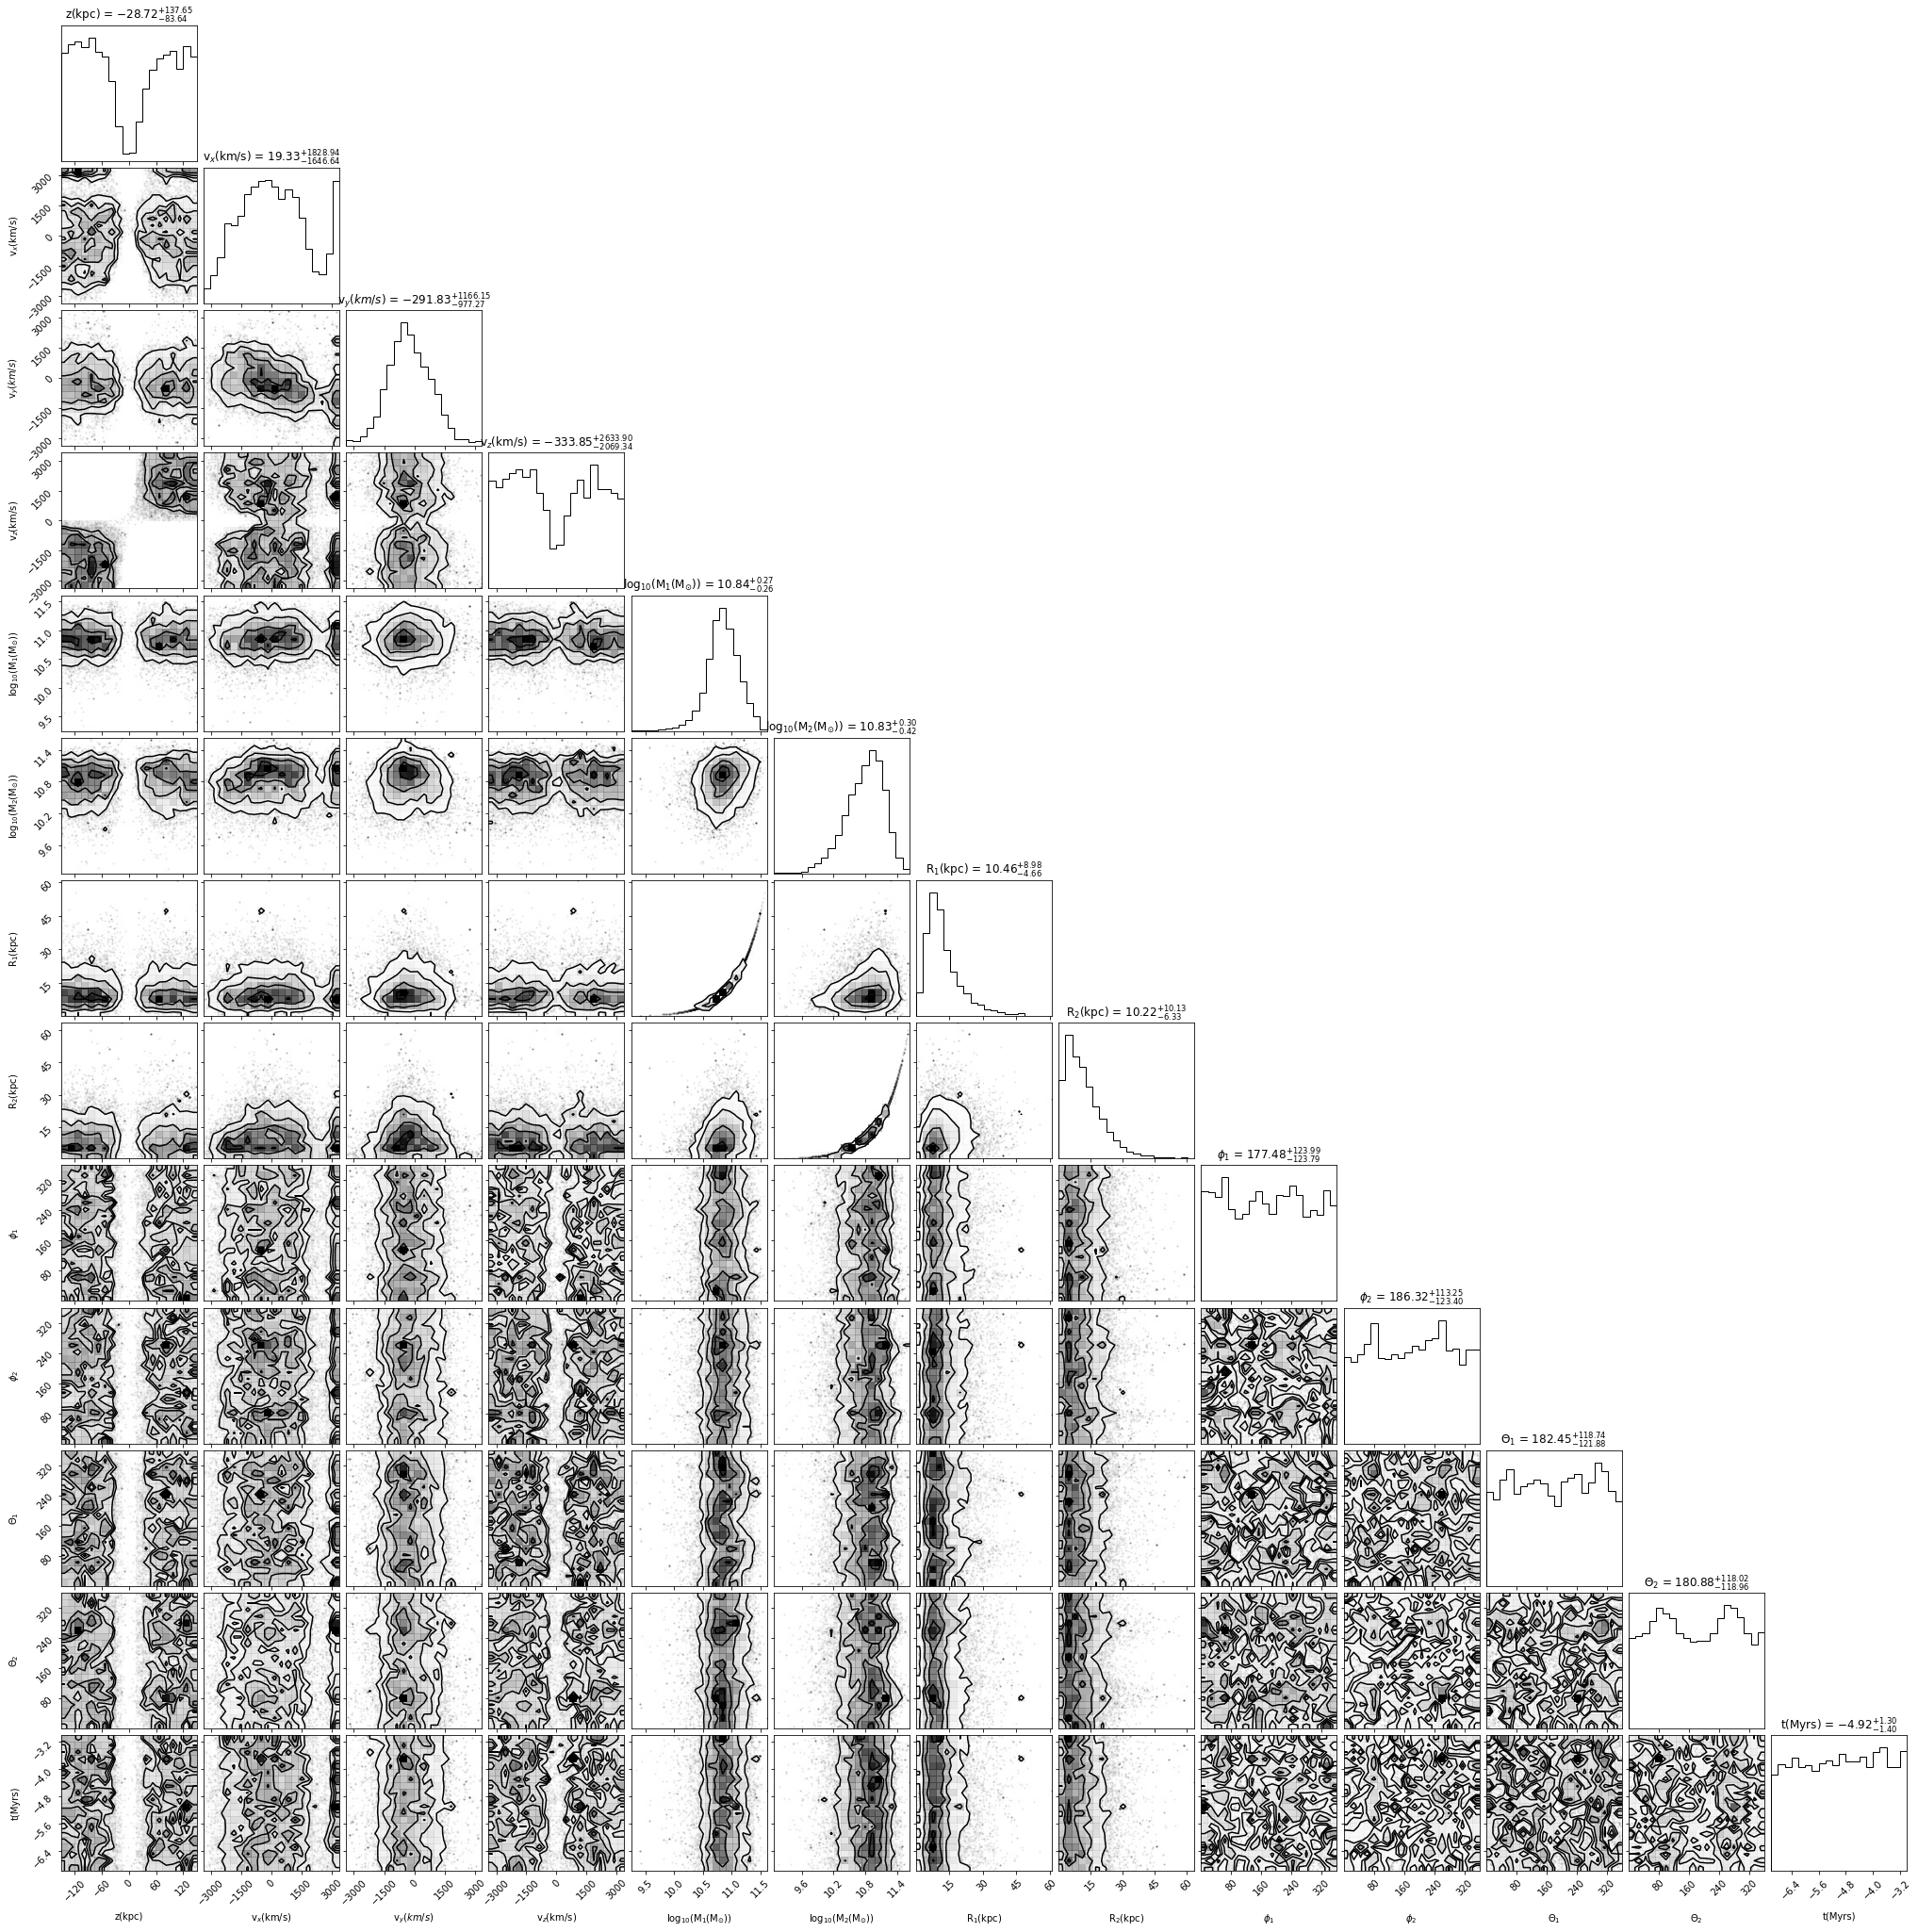

In [15]:
fig = corner.corner(samples_SI[:,:13],labels=Labels,show_titles=True)

In [40]:
samples_hist = samples[samples[:,13] > -1e30]

In [41]:
np.max(samples_hist[:,13])

-0.09219531141072168

In [42]:
np.where(samples == np.max(samples[:,13]))

(array([1213, 1293], dtype=int64), array([13, 13], dtype=int64))

In [43]:
samples[1305,:]

array([  6.54749635,  -3.39870822,  -1.03362549,   6.74354229,
         2.6596599 ,   1.84526165,   3.35933326,   0.53913689,
         6.87719539, 121.81537068, 179.24319979,  76.10624879,
        -3.8034603 ,  -0.64457657])

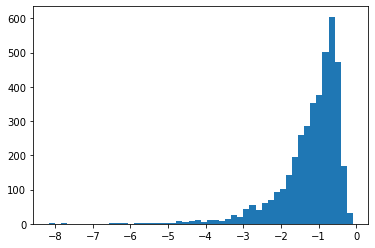

In [44]:
plt.hist(samples_hist[:,13], bins=50)
plt.show()

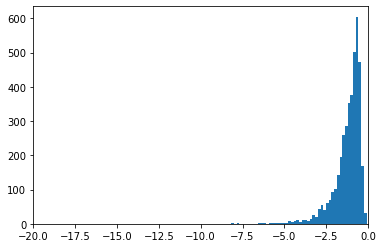

In [45]:
plt.hist(samples_hist[:,13], bins=50)
plt.xlim([-20,0])
plt.show()

In [46]:
samples_hist.shape

(4000, 14)

### Checking the Chain Paths